## RSI and 20 EMA Feature Creation 

In [34]:
import numpy as np

import pandas as pd 

In [39]:
df = pd.read_csv(r'C:\Users\Sejal Hanmante\OneDrive\Documents\GitHub\ForEx\all_data.csv')
df.head()

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair
0,2014-11-07,61.390,61.620,61.340,61.400,USD/INR
1,2014-11-10,61.500,61.635,61.340,61.495,USD/INR
2,2014-11-11,61.530,61.555,61.505,61.508,USD/INR
3,2014-11-12,61.508,61.560,61.350,61.391,USD/INR
4,2014-11-13,61.368,61.623,61.350,61.565,USD/INR


In [40]:
usd_inr = df.loc[df['Currency Pair']=='USD/INR']
usd_inr 

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair
0,2014-11-07,61.390,61.620,61.340,61.4000,USD/INR
1,2014-11-10,61.500,61.635,61.340,61.4950,USD/INR
2,2014-11-11,61.530,61.555,61.505,61.5080,USD/INR
3,2014-11-12,61.508,61.560,61.350,61.3910,USD/INR
4,2014-11-13,61.368,61.623,61.350,61.5650,USD/INR
...,...,...,...,...,...,...
2598,2024-10-24,84.045,84.080,84.017,84.0640,USD/INR
2599,2024-10-25,84.067,84.080,84.021,84.0750,USD/INR
2600,2024-10-28,84.062,84.080,84.016,84.0400,USD/INR
2601,2024-10-29,84.045,84.080,83.996,84.0380,USD/INR


In [26]:
usd_inr['Open_price'].min()

61.343

In [27]:
usd_inr['Open_price'].max()

84.081

## **Standard Function For RSI feature creation from data**

In [ ]:
def calculate_rsi(data: pd.DataFrame, column_name: str = 'Closing_price', period: int = 14) -> pd.Series:
    """
    Calculate the Relative Strength Index (RSI) for a given DataFrame.

    Parameters:
    - data (pd.DataFrame): Input DataFrame containing the price data.
    - column_name (str): The name of the column to calculate RSI on (default is 'Closing_price').
    - period (int): The number of periods to use for RSI calculation (default is 14).

    Returns:
    - pd.Series: A Pandas Series containing the RSI values.
    """
    
    # Ensure the column exists
    if column_name not in data.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")
    
    # Step 1: Calculate the daily change in the specified column (e.g., Closing Price)
    delta = data[column_name].diff()
    
    # Step 2: Calculate Gain and Loss
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    
    # Step 3: Create a DataFrame for Gain and Loss
    gain_df = pd.DataFrame(gain, columns=['Gain'])
    loss_df = pd.DataFrame(loss, columns=['Loss'])
    
    # Step 4: Calculate the rolling average gain and loss
    avg_gain = gain_df['Gain'].rolling(window=period, min_periods=1).mean()
    avg_loss = loss_df['Loss'].rolling(window=period, min_periods=1).mean()
    
    # Step 5: Calculate the Relative Strength (RS)
    rs = avg_gain / avg_loss
    
    # Step 6: Calculate the RSI
    rsi = 100 - (100 / (1 + rs))
    
    # Align the result with the input DataFrame
    rsi = pd.Series(rsi, name=f"RSI_{period}").fillna(0)
    
    return rsi


# Calculate RSI
usd_inr['RSI'] = calculate_rsi(usd_inr, 'Closing_price', 14)
usd_inr


NameError: name 'pd' is not defined

## **200 EMA**
The Exponential Moving Average (EMA) is a type of moving average that gives more weight to recent prices, making it more responsive to current price changes. The 200 EMA is a commonly used long-term trend indicator, especially in swing trading, to identify the overall market trend and potential support/resistance levels.

**Interpreting the 200 EMA:**
- Bullish Signal: If the price is above the 200 EMA, it often indicates an uptrend or bullish market sentiment.
- Bearish Signal: If the price is below the 200 EMA, it may indicate a downtrend or bearish market sentiment.
- Support/Resistance: The 200 EMA is often used as a dynamic support/resistance level.

In [15]:
import pandas as pd

def calculate_200ema(data: pd.DataFrame, column_name: str = 'Closing_price', period: int = 200) -> pd.Series:
    """
    Calculate the Exponential Moving Average (EMA) for a given DataFrame.

    Parameters:
    - data (pd.DataFrame): Input DataFrame containing the price data.
    - column_name (str): The name of the column to calculate EMA on (default is 'Closing_price').
    - period (int): The number of periods to use for EMA calculation (default is 200).

    Returns:
    - pd.Series: A Pandas Series containing the EMA values.
    """
    
    # Ensure the column exists
    if column_name not in data.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")
    
    # Calculate the EMA
    ema = data[column_name].ewm(span=period, adjust=False).mean()
    
    # Return the EMA as a Pandas Series
    return pd.Series(ema, name=f"EMA_{period}")


    
# Calculate 200 EMA
usd_inr['EMA_200'] = calculate_200ema(usd_inr, 'Closing_price', 200)
print(usd_inr[['Date', 'Closing_price', 'EMA_200']])


            Date  Closing_price    EMA_200
0     2014-11-07        61.4000  61.400000
1     2014-11-10        61.4950  61.400945
2     2014-11-11        61.5080  61.402010
3     2014-11-12        61.3910  61.401901
4     2014-11-13        61.5650  61.403524
...          ...            ...        ...
2598  2024-10-24        84.0640  83.503948
2599  2024-10-25        84.0750  83.509630
2600  2024-10-28        84.0400  83.514907
2601  2024-10-29        84.0380  83.520112
2602  2024-10-30        84.0825  83.525708

[2603 rows x 3 columns]


C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_22556\630774935.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usd_inr['EMA_200'] = calculate_200ema(usd_inr, 'Closing_price', 200)


## Support and Resistance Feature Creation 

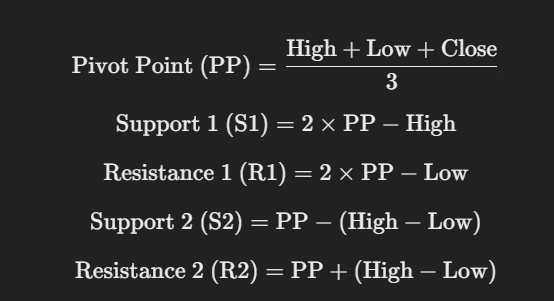

In [41]:

import pandas as pd

def calculate_swing_support_resistance(data: pd.DataFrame, timeframe: str = 'daily') -> pd.DataFrame:
    """
    Calculate Support and Resistance levels for Swing Trading using Pivot Points for the given timeframe.

    Parameters:
    - data (pd.DataFrame): Input DataFrame containing the price data.
    - timeframe (str): The timeframe for pivot point calculation, either 'daily', 'weekly', or 'monthly'.

    Returns:
    - pd.DataFrame: DataFrame with Pivot Points, Support, and Resistance levels, forward filled for non-resampled rows.
    """
    # Ensure the 'Date' column is in datetime format and set it as the index
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)

    if timeframe == 'daily':
        high_col = 'Day_high'
        low_col = 'Day_low'
        close_col = 'Closing_price'
    elif timeframe == 'weekly':
        # Resample for weekly data
        resampled_data = data.resample('W').agg({
            'Day_high': 'max',
            'Day_low': 'min',
            'Closing_price': 'last'
        })
        high_col = 'Day_high'
        low_col = 'Day_low'
        close_col = 'Closing_price'
    elif timeframe == 'monthly':
        # Resample for monthly data
        resampled_data = data.resample('M').agg({
            'Day_high': 'max',
            'Day_low': 'min',
            'Closing_price': 'last'
        })
        high_col = 'Day_high'
        low_col = 'Day_low'
        close_col = 'Closing_price'
    else:
        raise ValueError("Timeframe must be 'daily', 'weekly', or 'monthly'.")

    # Calculate Pivot Point, Support, and Resistance levels
    resampled_data['Pivot_Point'] = (resampled_data[high_col] + resampled_data[low_col] + resampled_data[close_col]) / 3
    resampled_data['Support_1'] = (2 * resampled_data['Pivot_Point']) - resampled_data[high_col]
    resampled_data['Resistance_1'] = (2 * resampled_data['Pivot_Point']) - resampled_data[low_col]
    resampled_data['Support_2'] = resampled_data['Pivot_Point'] - (resampled_data[high_col] - resampled_data[low_col])
    resampled_data['Resistance_2'] = resampled_data['Pivot_Point'] + (resampled_data[high_col] - resampled_data[low_col])

    # Forward fill the calculated levels for the original data
    resampled_data = resampled_data[['Pivot_Point', 'Support_1', 'Resistance_1', 'Support_2', 'Resistance_2']]
    data = data.join(resampled_data, how='outer')
    
    # Fill NaN values using forward fill and backward fill
    data[['Pivot_Point', 'Support_1', 'Resistance_1', 'Support_2', 'Resistance_2']] = data[['Pivot_Point', 'Support_1', 'Resistance_1', 'Support_2', 'Resistance_2']].ffill().bfill()

    # Reset the index for the final output
    data.reset_index(inplace=True)

    return data

# Example Usage
if __name__ == "__main__":
    # Assuming usd_inr is your dataset
    result_data = calculate_swing_support_resistance(usd_inr, timeframe='weekly')
    print(result_data[['Date', 'Pivot_Point', 'Support_1', 'Resistance_1', 'Support_2', 'Resistance_2']])


           Date  Pivot_Point  Support_1  Resistance_1  Support_2  Resistance_2
0    2014-11-07    61.453333  61.286667     61.566667  61.173333     61.733333
1    2014-11-09    61.453333  61.286667     61.566667  61.173333     61.733333
2    2014-11-10    61.453333  61.286667     61.566667  61.173333     61.733333
3    2014-11-11    61.453333  61.286667     61.566667  61.173333     61.733333
4    2014-11-12    61.453333  61.286667     61.566667  61.173333     61.733333
...         ...          ...        ...           ...        ...           ...
3120 2024-10-27    84.055667  84.031333     84.099333  83.987667     84.123667
3121 2024-10-28    84.055667  84.031333     84.099333  83.987667     84.123667
3122 2024-10-29    84.055667  84.031333     84.099333  83.987667     84.123667
3123 2024-10-30    84.055667  84.031333     84.099333  83.987667     84.123667
3124 2024-11-03    84.054500  84.024000     84.113000  83.965500     84.143500

[3125 rows x 6 columns]


C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_22556\4102892280.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])
